In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from lifelines import CoxPHFitter

# 读取数据集
data = pd.read_csv(r'C:\MyProject\MIMIC-IPE\加了中介变量的数据集\用于统计的完整数据集.csv')

# 将Group列转换为编码，IPE 组是0，DVT-PE 组是1
data['Group'] = data['Group'].replace({'IPE': 1, 'DVT-PE': 0})

# F.Hosp列转换为编码，Affirmative 是1，Negative 是0
data['F.Hosp'] = data['F.Hosp'].replace({'Affirmative': 1, 'Negative': 0})


# 2. 单变量生存分析
print("\n单变量Cox回归分析（Group）：")
cph_Group = CoxPHFitter()
cph_Group.fit(data[['T.O.D_180d', 'D180D', 'Group']], 'T.O.D_180d', event_col='D180D')
cph_Group=cph_Group.summary
print("这一步我们进行了单变量Cox回归分析，评估Group对生存时间的影响。结果显示了Group对生存时间的显著性，如果p值小于0.05，说明Group对生存时间有显著影响。")
print("\n单变量Cox回归分析（F.Hosp）：")
cph_F_Hosp = CoxPHFitter()
cph_F_Hosp.fit(data[['T.O.D_180d', 'D180D', 'F.Hosp']], 'T.O.D_180d', event_col='D180D')
cph_F_Hosp=cph_F_Hosp.summary
print("这一步我们进行了单变量Cox回归分析，评估F.Hosp对生存时间的影响。结果显示了F.Hosp对生存时间的显著性，如果p值小于0.05，说明F.Hosp对生存时间有显著影响。")
# 3. 多变量生存分析
print("\n多变量Cox回归分析：")
cph_multi = CoxPHFitter()
cph_multi.fit(data[['T.O.D_180d', 'D180D', 'Group', 'F.Hosp']], 'T.O.D_180d', event_col='D180D')
cph_multi=cph_multi.summary
print("这一步我们进行了多变量Cox回归分析，同时评估Group和F.Hosp对生存时间的影响。结果显示了在控制F.Hosp影响的情况下，Group对生存时间的独立影响。")
# 4. 交互项分析
data['Group_F_Hosp_interaction'] = data['Group'] * data['F.Hosp']
print("\n交互项Cox回归分析：")
cph_interaction = CoxPHFitter()
cph_interaction.fit(data[['T.O.D_180d', 'D180D', 'Group', 'F.Hosp', 'Group_F_Hosp_interaction']], 'T.O.D_180d', event_col='D180D')
cph_interaction=cph_interaction.summary
print("这一步我们引入了Group和F.Hosp的交互项，进行了Cox回归分析。结果显示了交互项的显著性，如果交互项的p值小于0.05，说明Group对生存时间的影响依赖于F.Hosp的水平。")
# 5. 分层分析
print("\n分层分析：")
# F.Hosp=0层次
print("\nF.Hosp=0层次的Cox回归分析：")
cph_F_Hosp0 = CoxPHFitter()
cph_F_Hosp0.fit(data[data['F.Hosp'] == 0][['T.O.D_180d', 'D180D', 'Group']], 'T.O.D_180d', event_col='D180D')
cph_F_Hosp0=cph_F_Hosp0.summary
print("这一步我们在F.Hosp=0的情况下，进行了Cox回归分析，评估Group对生存时间的影响。结果显示了在F.Hosp=0层次中，Group对生存时间的显著性。")

# F.Hosp=1层次
print("\nF.Hosp=1层次的Cox回归分析：")
cph_F_Hosp1 = CoxPHFitter()
cph_F_Hosp1.fit(data[data['F.Hosp'] == 1][['T.O.D_180d', 'D180D', 'Group']], 'T.O.D_180d', event_col='D180D')
cph_F_Hosp1=cph_F_Hosp1.summary
print("这一步我们在F.Hosp=1的情况下，进行了Cox回归分析，评估Group对生存时间的影响。结果显示了在F.Hosp=1层次中，Group对生存时间的显著性。")
# 6. 敏感性分析（倾向评分加权）
# 计算倾向评分
log_reg = LogisticRegression()
data['pscore'] = log_reg.fit(data[['Group', 'F.Hosp']], data['D180D']).predict_proba(data[['Group', 'F.Hosp']])[:, 1]

# 打印倾向评分，检查是否成功计算
print("\n倾向评分前几行：")
print(data[['pscore']].head())

# 计算权重，避免权重为零的情况
data['weights'] = 1 / data['pscore']
data.loc[data['weights'] == float('inf'), 'weights'] = 1.0

# 打印权重，检查是否成功计算
print("\n权重前几行：")
print(data[['weights']].head())

print("\n加权Cox回归分析：")
cph_weighted = CoxPHFitter()
cph_weighted.fit(data[['T.O.D_180d', 'D180D', 'Group', 'weights']], 'T.O.D_180d', event_col='D180D', weights_col='weights')
cph_weighted=cph_weighted.summary
print("这一步我们进行了加权Cox回归分析，使用倾向评分加权的方法，评估Group对生存时间的影响。结果显示了加权后，Group对生存时间的显著性。")



C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_18944\2541367959.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Group'] = data['Group'].replace({'IPE': 1, 'DVT-PE': 0})
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_18944\2541367959.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['F.Hosp'] = data['F.Hosp'].replace({'Affirmative': 1, 'Negative': 0})



单变量Cox回归分析（Group）：
这一步我们进行了单变量Cox回归分析，评估Group对生存时间的影响。结果显示了Group对生存时间的显著性，如果p值小于0.05，说明Group对生存时间有显著影响。

单变量Cox回归分析（F.Hosp）：
这一步我们进行了单变量Cox回归分析，评估F.Hosp对生存时间的影响。结果显示了F.Hosp对生存时间的显著性，如果p值小于0.05，说明F.Hosp对生存时间有显著影响。

多变量Cox回归分析：
这一步我们进行了多变量Cox回归分析，同时评估Group和F.Hosp对生存时间的影响。结果显示了在控制F.Hosp影响的情况下，Group对生存时间的独立影响。

交互项Cox回归分析：
这一步我们引入了Group和F.Hosp的交互项，进行了Cox回归分析。结果显示了交互项的显著性，如果交互项的p值小于0.05，说明Group对生存时间的影响依赖于F.Hosp的水平。

分层分析：

F.Hosp=0层次的Cox回归分析：
这一步我们在F.Hosp=0的情况下，进行了Cox回归分析，评估Group对生存时间的影响。结果显示了在F.Hosp=0层次中，Group对生存时间的显著性。

F.Hosp=1层次的Cox回归分析：
这一步我们在F.Hosp=1的情况下，进行了Cox回归分析，评估Group对生存时间的影响。结果显示了在F.Hosp=1层次中，Group对生存时间的显著性。

倾向评分前几行：
     pscore
0  0.265467
1  0.181448
2  0.134020
3  0.134020
4  0.086693

权重前几行：
     weights
0   3.766943
1   5.511221
2   7.461551
3   7.461551
4  11.534906

加权Cox回归分析：
这一步我们进行了加权Cox回归分析，使用倾向评分加权的方法，评估Group对生存时间的影响。结果显示了加权后，Group对生存时间的显著性。


C:\Users\ZhouNan\anaconda3\envs\NN\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1356: StatisticalWarning: It appears your weights are not integers, possibly propensity or sampling scores then?
It's important to know that the naive variance estimates of the coefficients are biased. Instead a) set `robust=True` in the call to `fit`, or b) use Monte Carlo to
estimate the variances. See paper "Variance estimation when using inverse probability of treatment weighting (IPTW) with survival analysis"

  warnings.warn(


C:\Users\ZhouNan\anaconda3\envs\NN\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ZhouNan\anaconda3\envs\NN\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


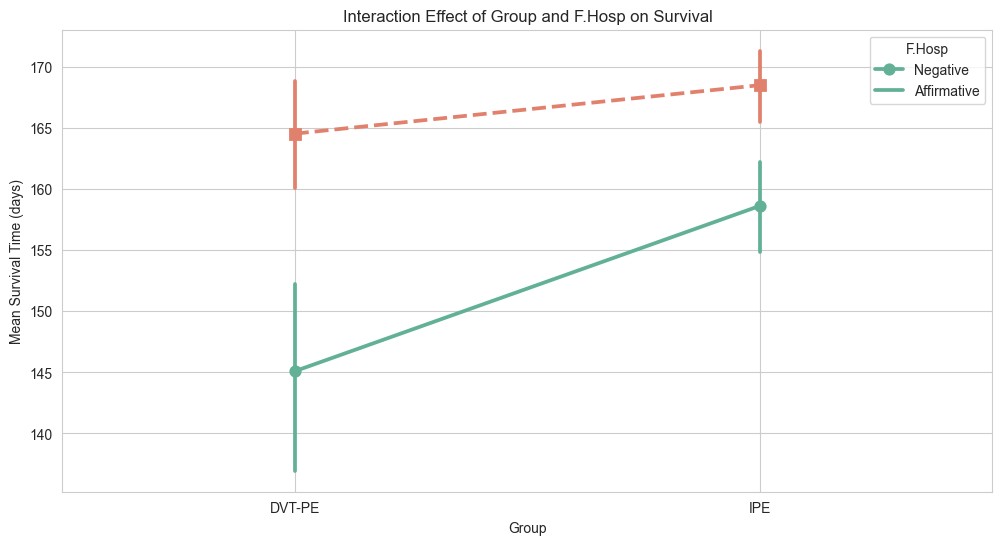

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the actual dataset
data = pd.read_csv('C:\\MyProject\\MIMIC-IPE\\加了中介变量的数据集\\用于COX_sur的特征数据集.csv')

# Ensure the columns 'Group' and 'F.Hosp' are in the correct format


# 定义颜色字典
colors = {0: '#62B197', 1: '#E1816D'}

# 绘制交互效应图
plt.figure(figsize=(12, 6))
sns.pointplot(x='Group', y='T_O_D_180d', hue='F.Hosp', data=data, markers=['o', 's'], linestyles=['-', '--'], palette=colors)

plt.title('Interaction Effect of Group and F.Hosp on Survival')
plt.xlabel('Group')
plt.xticks([0, 1], ['DVT-PE', 'IPE'])
plt.ylabel('Mean Survival Time (days)')
plt.legend(title='F.Hosp', labels=['Negative', 'Affirmative'])
plt.grid(True)
# 保存图片到C:\MyProject\MIMIC-IPE\results\交互效应图.png，dpi=300，高清，宽边缘
plt.savefig(r'C:\MyProject\MIMIC-IPE\results\交互效应图.png', dpi=300, bbox_inches='tight')
plt.show()


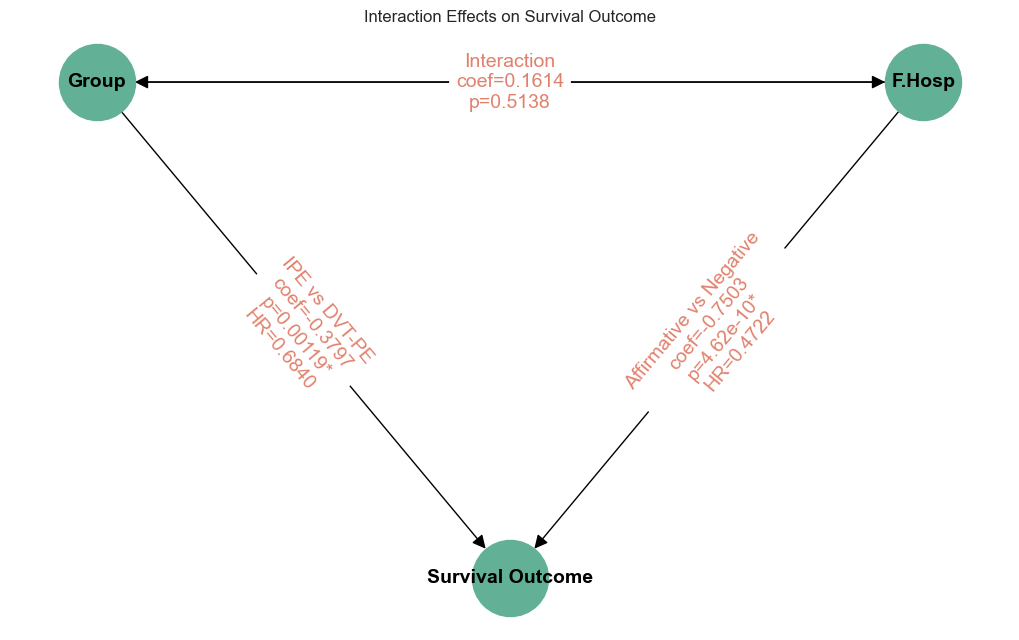

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
# 设置颜色
node_color = '#62B197'
edge_color = '#E1816D'
# Create a directed graph
G = nx.DiGraph()

# Add nodes for the variables
G.add_node("Group", shape='box')
G.add_node("F.Hosp", shape='box')
G.add_node("Survival Outcome", shape='ellipse')

# Add edges for the direct effects
G.add_edge("Group", "Survival Outcome", label=f"IPE vs DVT-PE\ncoef=-0.3797\np=0.00119*\nHR=0.6840")
G.add_edge("F.Hosp", "Survival Outcome", label=f"Affirmative vs Negative\ncoef=-0.7503\np=4.62e-10*\nHR=0.4722")

# Add edges for the interaction effect
G.add_edge("Group", "F.Hosp", label=f"Interaction\ncoef=0.1614\np=0.5138", style='dashed')
G.add_edge("F.Hosp", "Group", label=f"Interaction\ncoef=0.1614\np=0.5138", style='dashed')

# Define node positions
pos = {
    "Group": (0, 1),
    "F.Hosp": (2, 1),
    "Survival Outcome": (1, 0),
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_color, font_size=14, font_weight='bold', arrowsize=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color=edge_color, font_size=14)

# Show the plot
plt.title("Interaction Effects on Survival Outcome")
# 保存，dpi=300，高清，宽边缘
plt.savefig(r'C:\MyProject\MIMIC-IPE\results\交互效应连线.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
# 将cph_Group，cph_F_Hosp，cph_multi，cph_interaction，cph_F_Hosp0，cph_F_Hosp1，cph_weighted保存到Excel文件的不同sheet中
with pd.ExcelWriter(r'C:\MyProject\MIMIC-IPE\results\交互分析.xlsx') as writer:
    cph_Group.to_excel(writer, sheet_name='cph_Group')
    cph_F_Hosp.to_excel(writer, sheet_name='cph_F_Hosp')
    cph_multi.to_excel(writer, sheet_name='cph_multi')
    cph_interaction.to_excel(writer, sheet_name='cph_interaction')
    cph_F_Hosp0.to_excel(writer, sheet_name='cph_F_Hosp0')
    cph_F_Hosp1.to_excel(writer, sheet_name='cph_F_Hosp1')
    cph_weighted.to_excel(writer, sheet_name='cph_weighted')

In [10]:
from docx import Document

# 创建一个新的Word文档
doc = Document()

# 定义一个函数来添加表格
def add_table_to_doc(doc, df, title):
    doc.add_heading(title, level=1)
    table = doc.add_table(df.shape[0]+1, df.shape[1])
    for j in range(df.shape[-1]):
        table.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            table.cell(i+1,j).text = str(df.values[i,j])

# 添加cph_Group的结果
add_table_to_doc(doc, cph_Group, '单变量Cox回归分析（Group）')

# 添加cph_F_Hosp的结果
add_table_to_doc(doc, cph_F_Hosp, '单变量Cox回归分析（F.Hosp）')

# 添加cph_multi的结果
add_table_to_doc(doc, cph_multi, '多变量Cox回归分析')

# 添加cph_interaction的结果
add_table_to_doc(doc, cph_interaction, '交互项Cox回归分析')

# 添加cph_F_Hosp0的结果
add_table_to_doc(doc, cph_F_Hosp0, 'F.Hosp=0层次的Cox回归分析')

# 添加cph_F_Hosp1的结果
add_table_to_doc(doc, cph_F_Hosp1, 'F.Hosp=1层次的Cox回归分析')

# 添加cph_weighted的结果
add_table_to_doc(doc, cph_weighted, '加权Cox回归分析')



# 保存Word文档C:\MyProject\MIMIC-IPE\results\交互分析.docx
doc.save(r'C:\MyProject\MIMIC-IPE\results\交互分析.docx')